In [1]:
# numerical laibary
import numpy as np

# import pandas laibary
import pandas as pd

# plotting laibary
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Regression model
from sklearn.linear_model import LogisticRegression

# Regressor model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# import ensmble meethod
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
# load dataset
ds=pd.read_csv('PP.csv')
ds

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# put into datframe
df=pd.DataFrame(ds)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()  #upper top 5 rows

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [8]:
df.tail()  #bottom 5 rows

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.sample()  #random row

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
339,IND,India,KHAMBERKHERA IPP,IND0000193,90.0,28.017,80.8307,Coal,Oil,NaN,...,2019.0,NaN,474.37,289.245,340.2,163.611,126.5895,NaN,Central Electricity Authority,NaN


In [10]:
# check dataset frame
type(df)

pandas.core.frame.DataFrame

In [11]:
# check inforamation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

1. In our dataset we have 907 columns and 27 rows in it.
2. In dataset 15 variable is out of 27 is float type and 12 variable is out of 27 is object type.
3. Null valuesb are present in latitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,geolocation_source,wepp_id, year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh.

In [12]:
# check total null in dataset 
df.isnull().sum().sum()

10445

toatl number of null values in dataset is 10445

In [13]:
# check null values in each variable
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Null values in dataset-->
latitude                     46
longitude                    46
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907

There are all null values are present in columns, so we drop it-->
1. other_fuel2----->              906
2. other_fuel3----->                907
3. wepp_id----->                  907
4. generation_gwh_2013----->        907
5. generation_gwh_2019----->        907
6. estimated_generation_gwh----->    907

<AxesSubplot:>

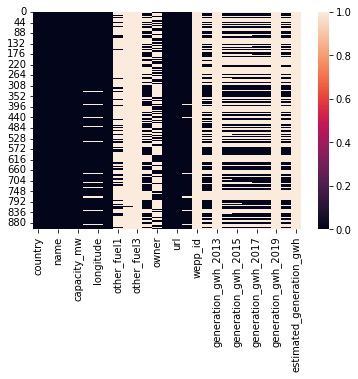

In [14]:
# see null values in plot daigram
sns.heatmap(df.isnull())

### Drop thoes columns where all all rows of columns are null

In [15]:
# drop which columns where all null values are present
df=df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [16]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove unwanted variables from dataset
1. Country-->there is only one country so this is not requried.
2. Country_logo-->Only on ecountry logo so drop it.
3. Source-->not requried.
4. Url-->Not requried.
5. name-->not requried.

In [17]:
# remove unwanted columns like object type ,where no use more
df=df.drop(['country','country_long','url','name','source','owner'],axis=1)

In [18]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Separate Both dataset into object and float type daatset

# Float type dataset

In [19]:
df1=df.select_dtypes('float')
df1

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# check null values in float typpe dataset
df1.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [21]:
# First of all remove null values
from sklearn.impute import SimpleImputer

In [22]:
imp=SimpleImputer(strategy='mean')

In [23]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [24]:
df1

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [25]:
df1.isnull().sum().sum()  #check null values after apply impute method

0

# Comparision in float type dataset variable and target Primary_fuel

In [26]:
def numeriacl_plot(df1,variable,target=df['primary_fuel']):
    """A function for plotting the distribution of numerical variables and its effect on capacity_mw"""
        
    fig,ax=plt.subplots(ncols=2 ,figsize=(20,5))
    #boxplot for comparision
    sns.boxplot(x=target ,y=variable ,data=df ,ax=ax[0])
    ax[0].set_title(f"Comparision of {variable} vs {target}")
    
    #distribution plot for variable
    ax[1].set_title(f" Distribution of {variable}")
    ax[1].set_ylabel('Frequency')
    sns.distplot(a = df1[variable], ax=ax[1])
    
    plt.show()

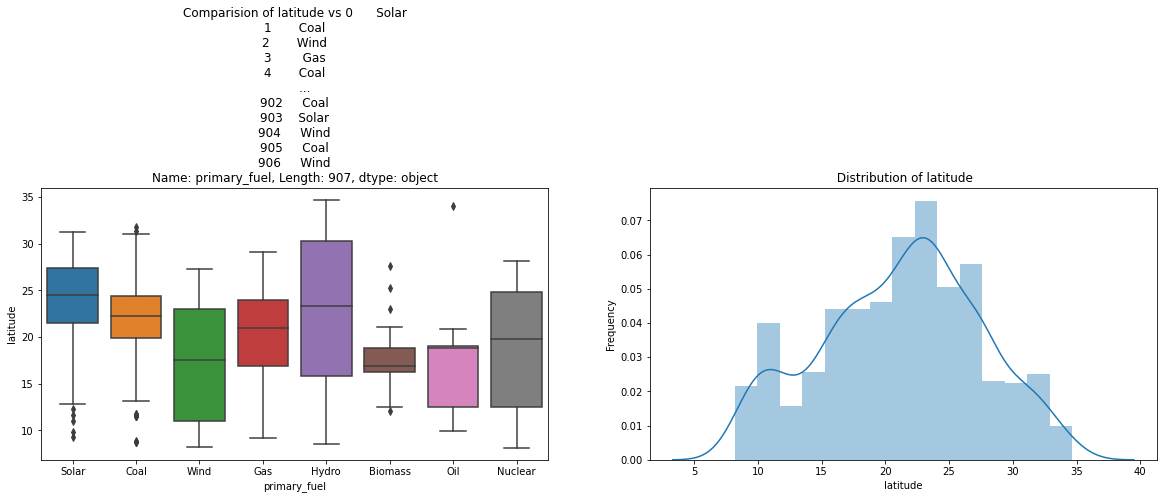

In [27]:
numeriacl_plot(df,variable='latitude')

As we see that in primary fuel Hydro is used after this coal as 2nd place.At 22 to 25 high latitude capacity of power plant is high.

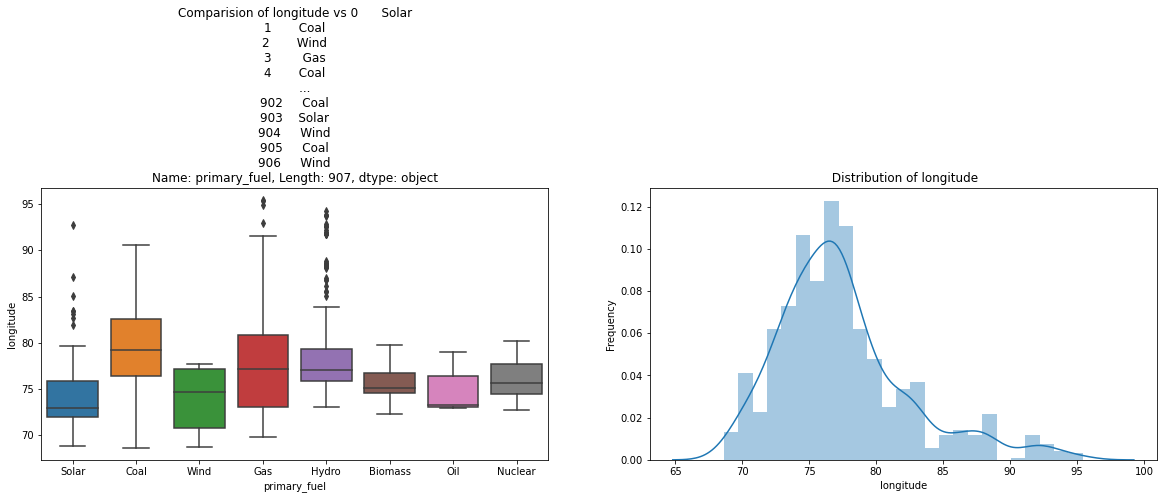

In [28]:
numeriacl_plot(df,variable='longitude')

1. At langitude in primary fuel type coal is used then gas take 2nd place.
2. At 75 to 80 high longitude capacity of the power plant is high.

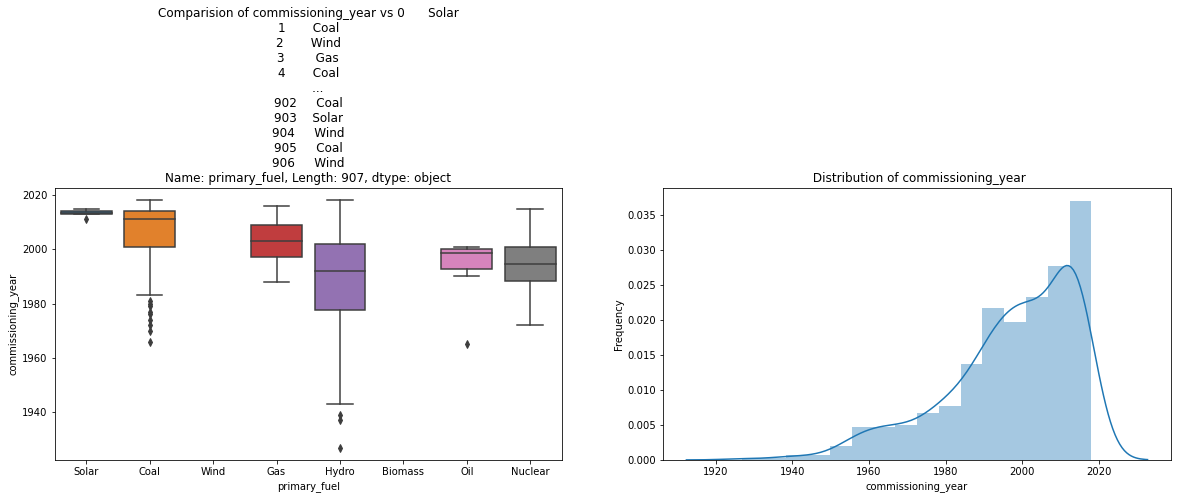

In [29]:
numeriacl_plot(df,variable='commissioning_year')

In commission year maximum power plant is make  near 2020, and in maximum power plant running with hydropower as the primary fuel

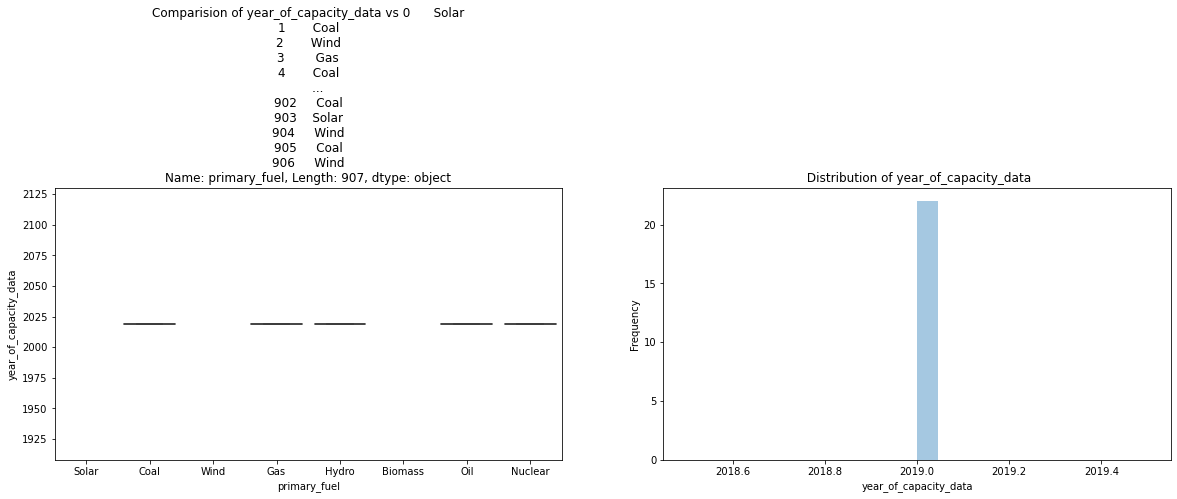

In [30]:
numeriacl_plot(df,variable='year_of_capacity_data')

It is insufficient variable.By this we not get any type info so we drop it.

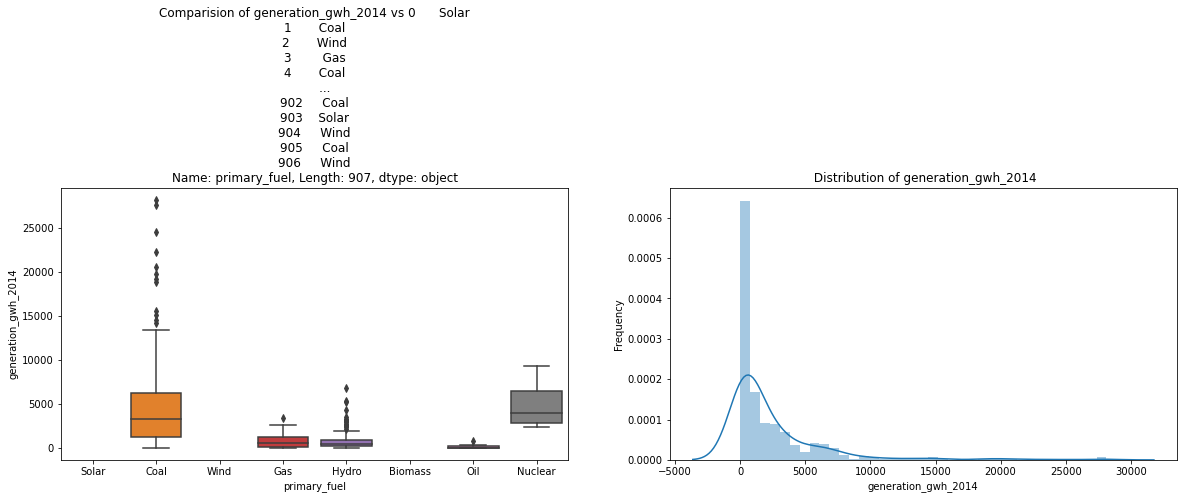

In [31]:
numeriacl_plot(df,variable='generation_gwh_2014')

1. Maximum power generated in 2014 perid with coal as primary fuel.

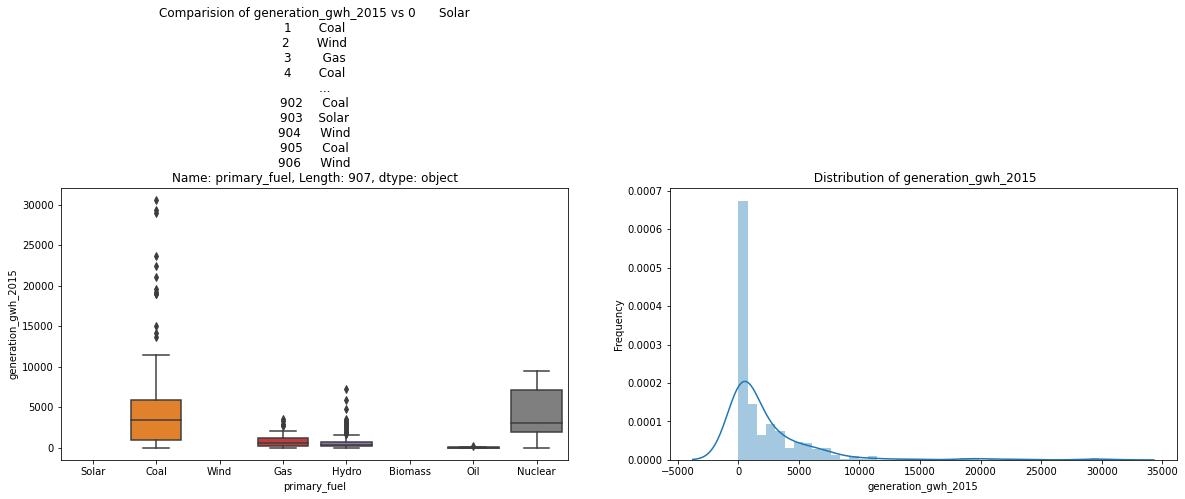

In [32]:
numeriacl_plot(df,variable='generation_gwh_2015')

1. Maximum power generated in 2015 perid with coal as primary fuel then 2nd place take by nuclear fuel.
2. According to generation 2015 the capacity of power plant in gwh reported near 35000mw

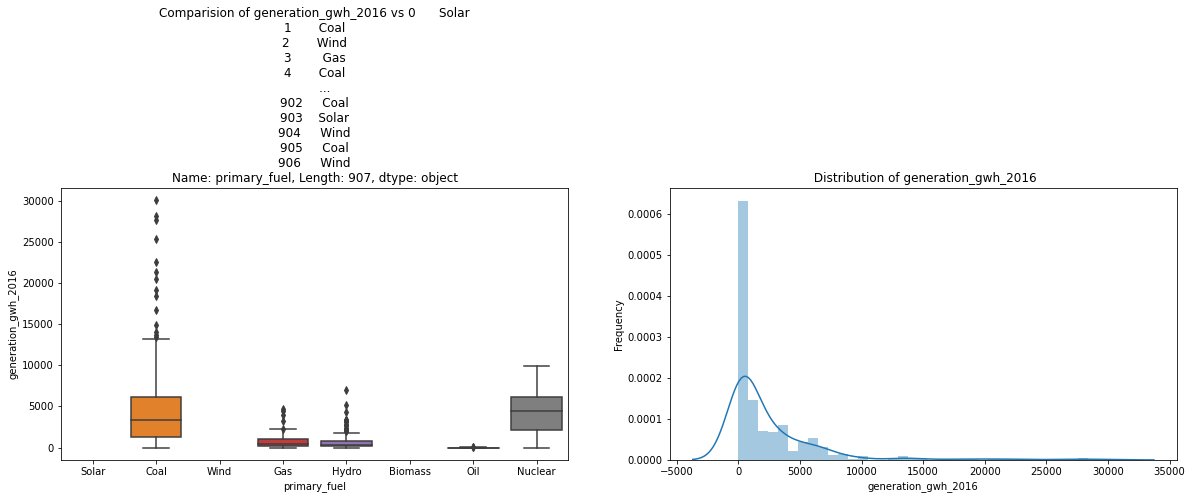

In [33]:
numeriacl_plot(df,variable='generation_gwh_2016')

1. Maximum power generated in 2016 perid with coal as primary fuel then 2nd place take by nuclear fuel.
2. According to generation 2016 the capacity of power plant in gwh reported near 35000mw

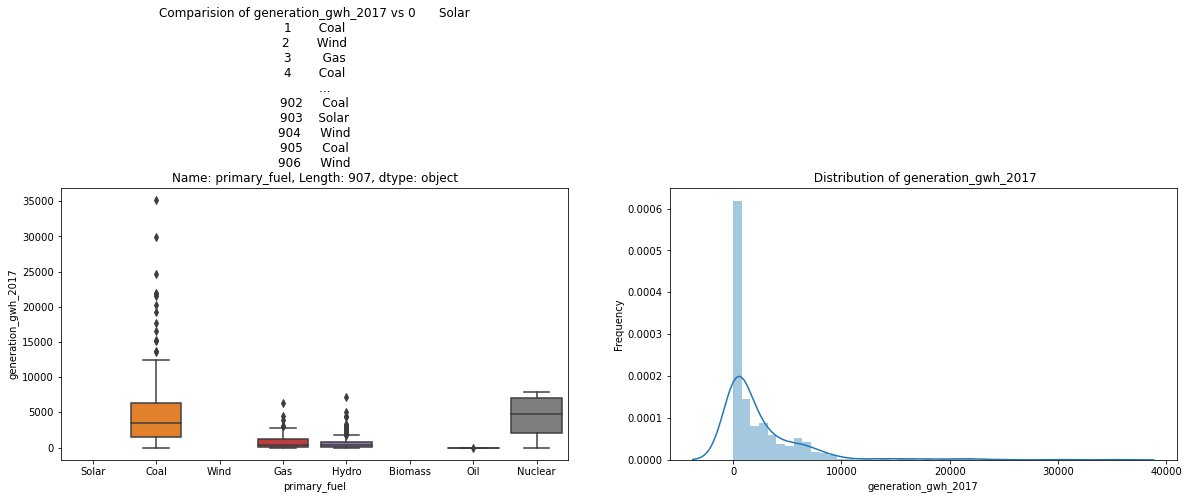

In [34]:
numeriacl_plot(df,variable='generation_gwh_2017')

1. Maximum power generated in 2017 perid with coal as primary fuel then 2nd place take by nuclear fuel.
2. According to generation 2017 the capacity of power plant in gwh reported near 40000mw.

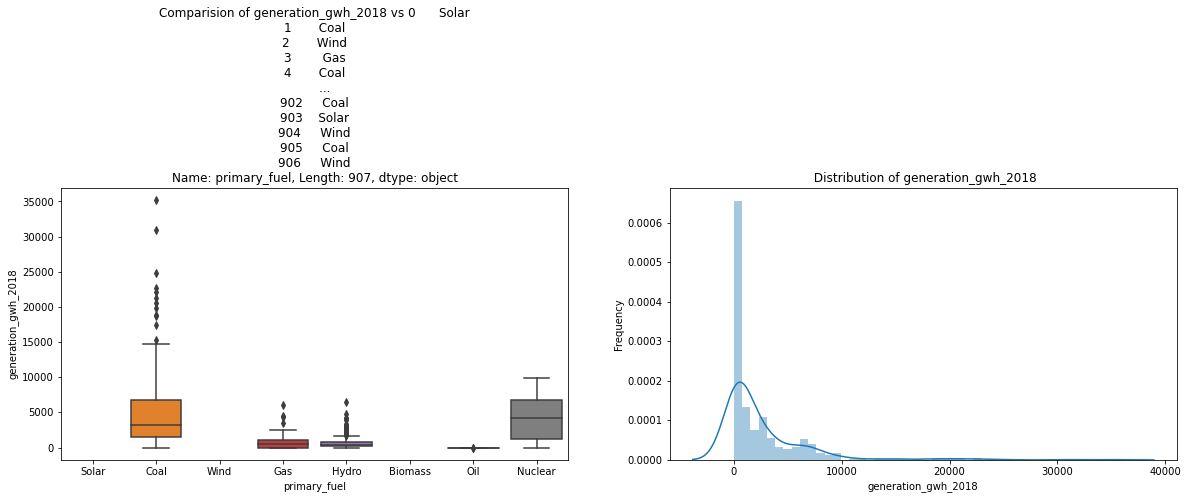

In [35]:
numeriacl_plot(df,variable='generation_gwh_2018')

1. Maximum power generated in 2018 perid with coal as primary fuel then 2nd place take by nuclear fuel.
2. According to generation 2018 the capacity of power plant in gwh reported near 40000mw.

### Drop year_of_capacity_data it not correlated with target sowe remove it

In [36]:
df1=df1.drop(['year_of_capacity_data'],axis=1)
df1

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Create a dataset of object types

In [37]:
df2=df.select_dtypes('object')
df2

,gppd_idnr,primary_fuel,other_fuel1,geolocation_source,generation_data_source
0,WRI1020239,Solar,NaN,National Renewable Energy Laboratory,NaN
1,WRI1019881,Coal,NaN,WRI,NaN
2,WRI1026669,Wind,NaN,WRI,NaN
3,IND0000001,Gas,NaN,WRI,Central Electricity Authority
4,IND0000002,Coal,Oil,WRI,Central Electricity Authority
...,...,...,...,...,...
902,IND0000513,Coal,Oil,WRI,Central Electricity Authority
903,WRI1026222,Solar,NaN,Industry About,NaN
904,WRI1026776,Wind,NaN,WRI,NaN
905,WRI1019901,Coal,NaN,WRI,NaN


In [38]:
# check null values in object type dataset
df2.isnull().sum()

gppd_idnr                   0
primary_fuel                0
other_fuel1               709
geolocation_source         19
generation_data_source    458
dtype: int64

In [39]:
# Apply impute method to fill null values
from sklearn.impute import SimpleImputer

In [40]:
imp=SimpleImputer(strategy='most_frequent')

In [41]:
for i in df2.columns:
    df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))

In [42]:
df2.isnull().sum()

gppd_idnr                 0
primary_fuel              0
other_fuel1               0
geolocation_source        0
generation_data_source    0
dtype: int64

No null values are present in object type dataset after applying the imputer method

In [43]:
df2['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

There are many 10 or 12 character identifier for the power plant

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

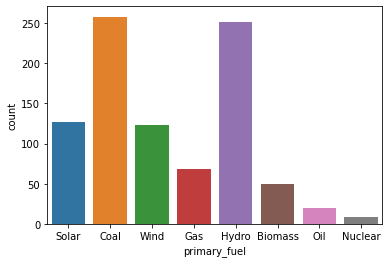

In [44]:
sns.countplot(df2['primary_fuel'])
df2['primary_fuel'].unique()

In our dataset, 8 types of fuel are used in power plants. Here coal and Hydro as fuel are very used. As primary fuel, most power plants use coal, then hydro comes at 2nd place after coal.

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

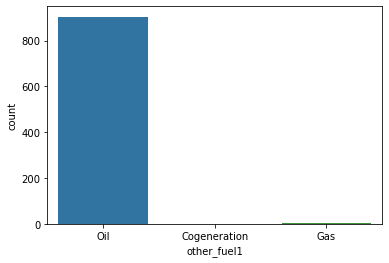

In [45]:
sns.countplot(df2['other_fuel1'])
df2['other_fuel1'].unique()

There are mainly other 3 types of fuel used. When another fuel is used then the oil is used as fuel

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

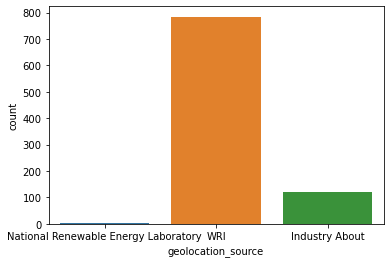

In [46]:
sns.countplot(df2['geolocation_source'])
df2['geolocation_source'].unique()

Here wri is used as geolocation_source

array(['Central Electricity Authority'], dtype=object)

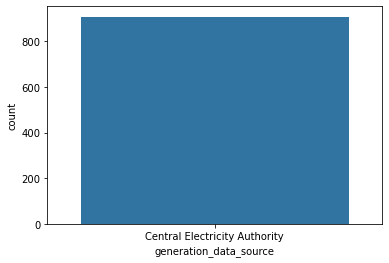

In [47]:
sns.countplot(df2['generation_data_source'])
df2['generation_data_source'].unique()

Here is only one Central Electricity Authority where we get generation data sources. Here is only one type of data so it is not important for us, so we drop it.

In [48]:
df2=df2.drop(['generation_data_source'],axis=1)

# Object type mix plot with target

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
df2['primary']=le.fit_transform(df2['primary_fuel'])  #make a int type columns from primary fuel for plotting

In [52]:
df2

,gppd_idnr,primary_fuel,other_fuel1,geolocation_source,primary
0,WRI1020239,Solar,Oil,National Renewable Energy Laboratory,6
1,WRI1019881,Coal,Oil,WRI,1
2,WRI1026669,Wind,Oil,WRI,7
3,IND0000001,Gas,Oil,WRI,2
4,IND0000002,Coal,Oil,WRI,1
...,...,...,...,...,...
902,IND0000513,Coal,Oil,WRI,1
903,WRI1026222,Solar,Oil,Industry About,6
904,WRI1026776,Wind,Oil,WRI,7
905,WRI1019901,Coal,Oil,WRI,1


In [53]:
def categorical_plot(df2,variable,invert_axis=False,target=df2['primary']):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    
    if invert_axis == False:
        sns.countplot(x = variable, data=df2,hue=df2["primary"],ax=ax[0])
    else:
        sns.countplot(y =variable, data=df2,hue=df2["primary"],ax=ax[0])
        
    ax[0].set_title(f"Comparision of {variable} vs capacity_mw")
    
    #plot the effect of variable on capacity_mw
    if invert_axis == False:
        sns.barplot(x = variable, y = target ,data=df2)
    else:
        sns.barplot(y =variable, x = target ,data=df2)
        
    ax[1].set_title("Primary_fuel {}".format(variable))
    ax[1].set_ylabel("Average(capacity)")
    plt.tight_layout()
    plt.show()

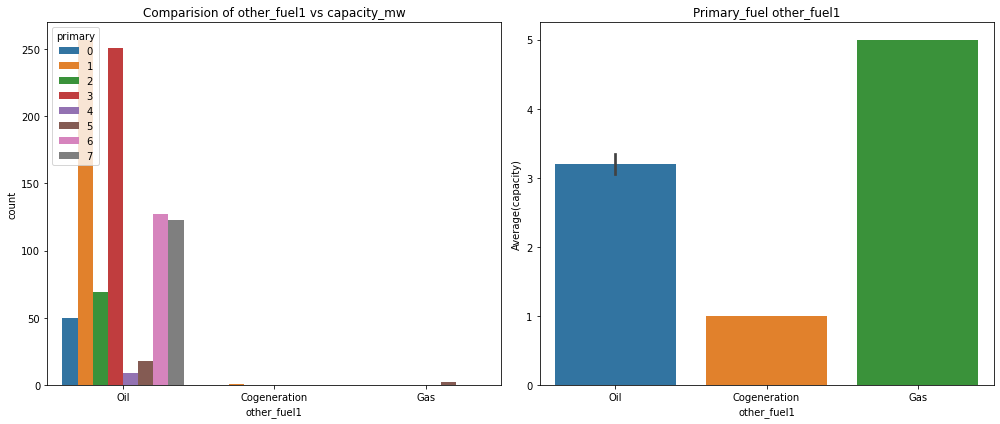

In [54]:
categorical_plot(df2,variable='other_fuel1')

As we have seen that here major power capacity is present in oil fuel and gas is used to produce more power

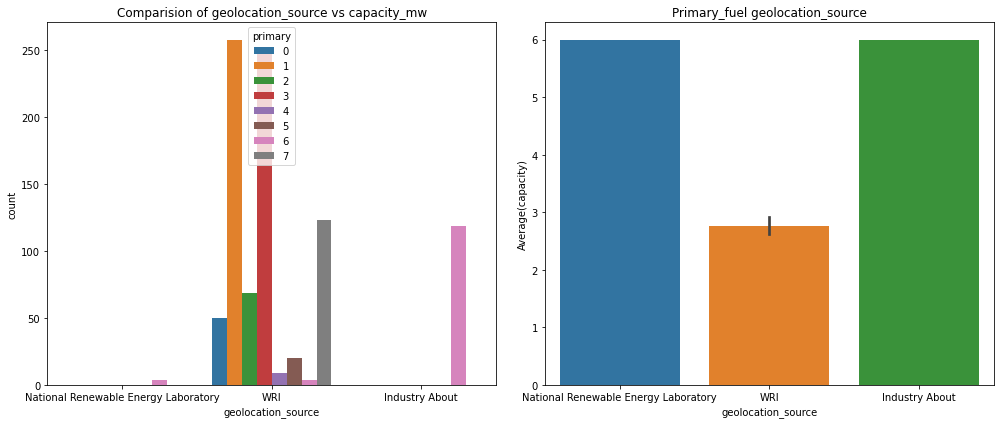

In [55]:
categorical_plot(df2,variable='geolocation_source')

In [56]:
df2

,gppd_idnr,primary_fuel,other_fuel1,geolocation_source,primary
0,WRI1020239,Solar,Oil,National Renewable Energy Laboratory,6
1,WRI1019881,Coal,Oil,WRI,1
2,WRI1026669,Wind,Oil,WRI,7
3,IND0000001,Gas,Oil,WRI,2
4,IND0000002,Coal,Oil,WRI,1
...,...,...,...,...,...
902,IND0000513,Coal,Oil,WRI,1
903,WRI1026222,Solar,Oil,Industry About,6
904,WRI1026776,Wind,Oil,WRI,7
905,WRI1019901,Coal,Oil,WRI,1


# Change object type to int type

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
for i in df2.columns:
    df2[i]=le.fit_transform(df2[i])

In [60]:
df3=pd.concat([df1,df2],axis=1)
df3

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,other_fuel1,geolocation_source,primary
0,2.5,28.1839,73.2407,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,657,6,2,1,6
1,98.0,24.7663,74.6090,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,519,1,2,2,1
2,39.2,21.9038,69.3732,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,853,7,2,2,7
3,135.0,23.8712,91.3602,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,0,2,2,2,2
4,1800.0,21.9603,82.4091,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000,491,1,2,2,1
903,3.0,12.8932,78.1654,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,822,6,2,0,6
904,25.5,15.2758,75.5811,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,891,7,2,2,7
905,80.0,24.3500,73.7477,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,539,1,2,2,1


# DESCRIBE STATISTIC

In [61]:
df3.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,other_fuel1,geolocation_source,primary
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,453.000000,3.206174,1.995590,1.733186,3.206174
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,261.972645,2.280652,0.081259,0.677151,2.280652
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340,226.500000,1.000000,2.000000,2.000000,1.000000
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,453.000000,3.000000,2.000000,2.000000,3.000000
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,679.500000,6.000000,2.000000,2.000000,6.000000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,906.000000,7.000000,2.000000,2.000000,7.000000


1. Right side skewness are present->Capacity_mw,Longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,
2. Left side skewness are present--->Latitude
3. Outliers-->Capicty_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018

# CHECK OUTLIERS

In [62]:
col=df3.columns
ncol=6
nrow=3

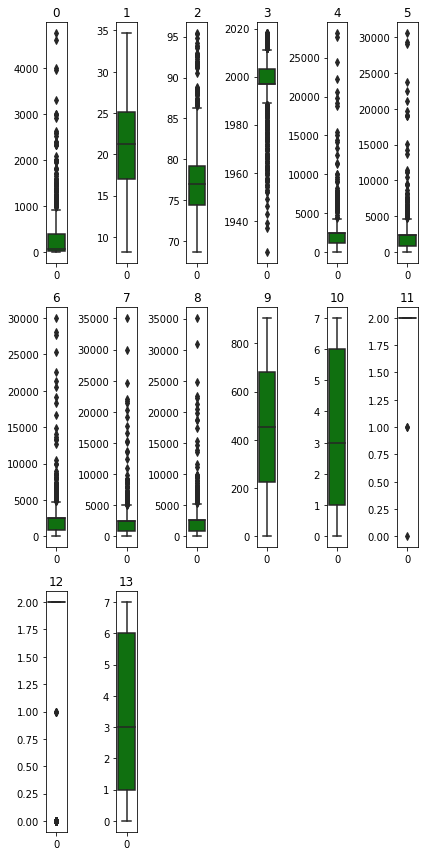

In [63]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df3[col[i]],color='green',orient='v')
    plt.savefig('Power_Plant_Outliers')
    plt.tight_layout()

Outliers are present-->capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
generation_gwh_2017,generation_gwh_2018,Source

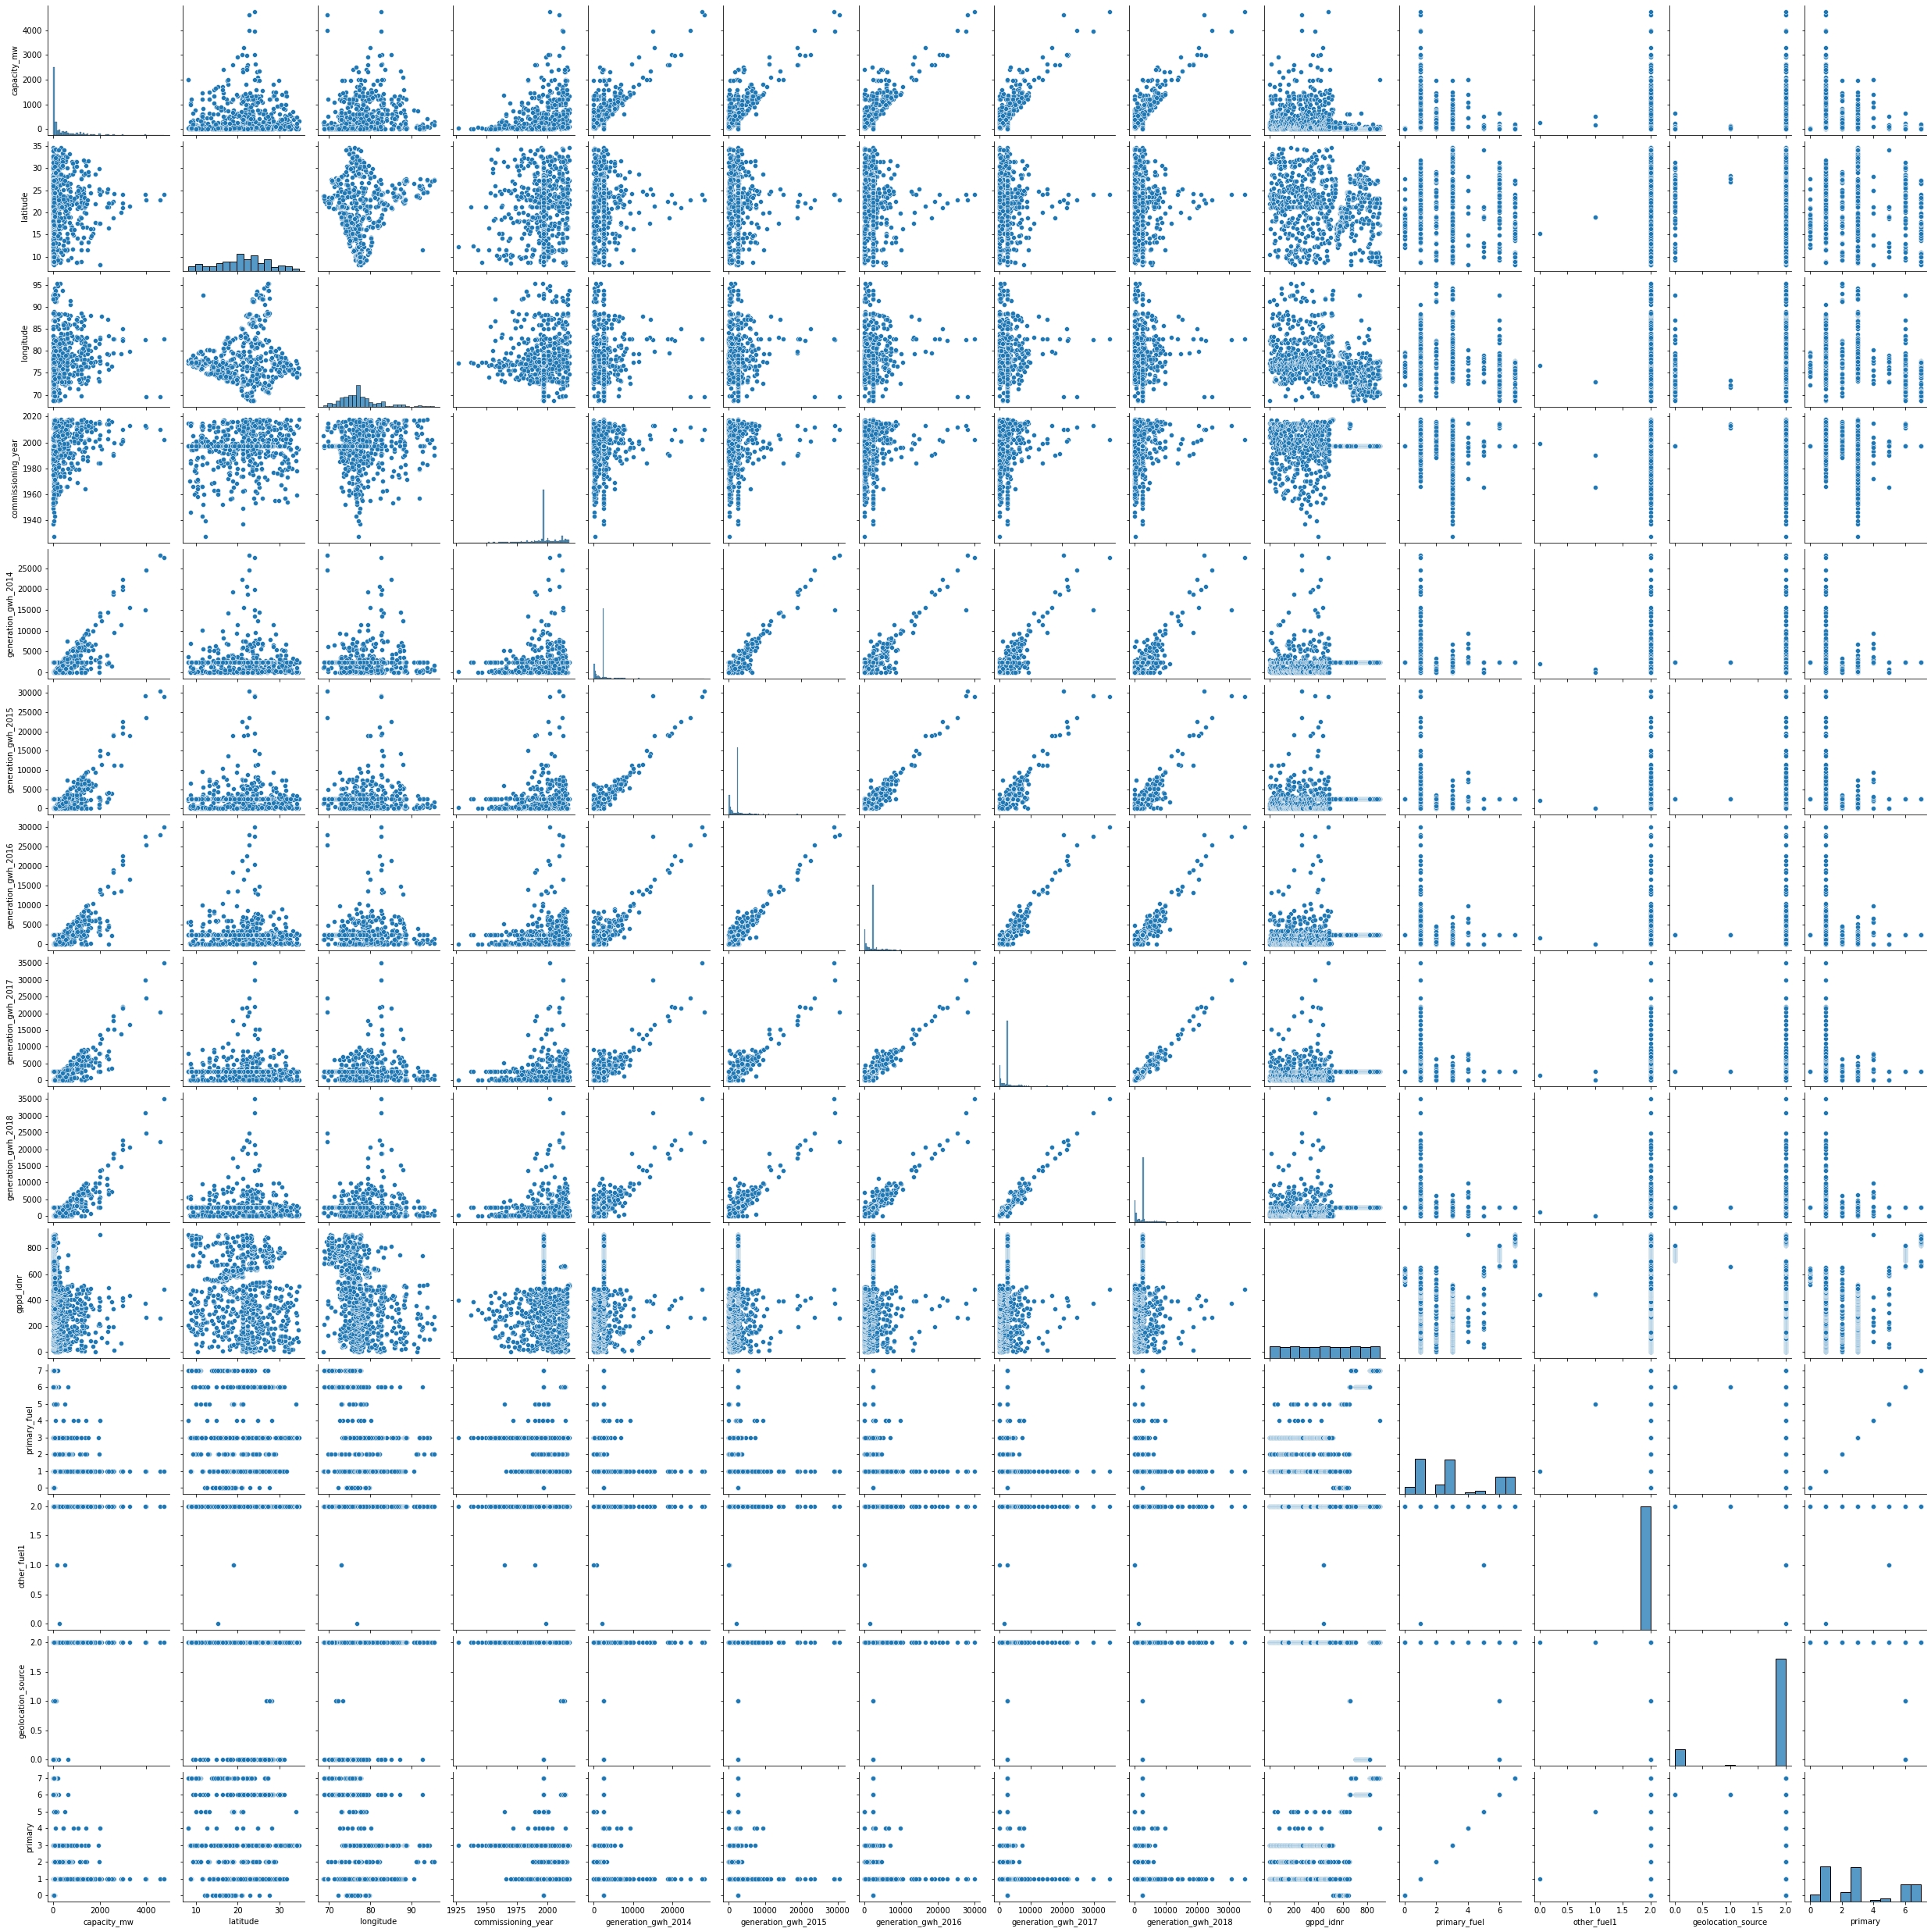

In [64]:
# pair plot
sns.pairplot(df3)

# Check skewness

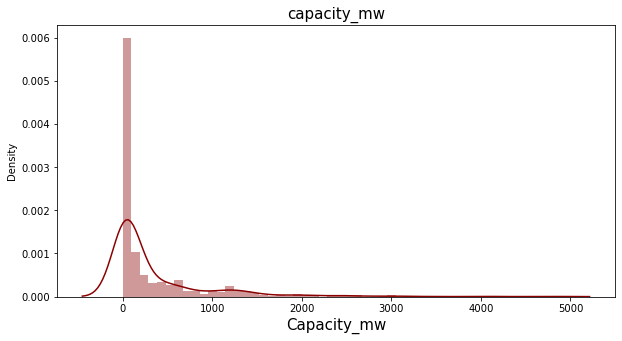

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(df3['capacity_mw'],color='darkred')
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

Skewness is pesent in right side

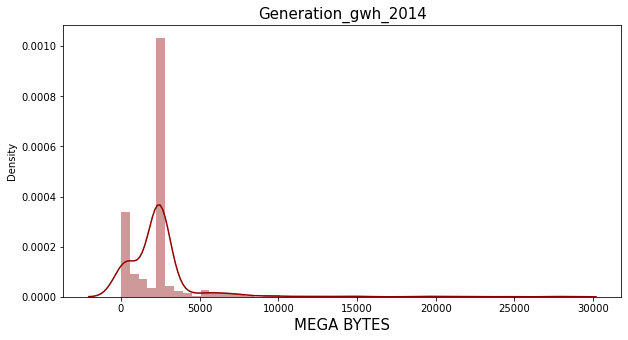

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(df3['generation_gwh_2014'],color='darkred')
plt.title('Generation_gwh_2014', fontsize=15)
plt.xlabel('MEGA BYTES', fontsize=15)
plt.show()

Skewness is pesent in generation_gwh_2014 right side

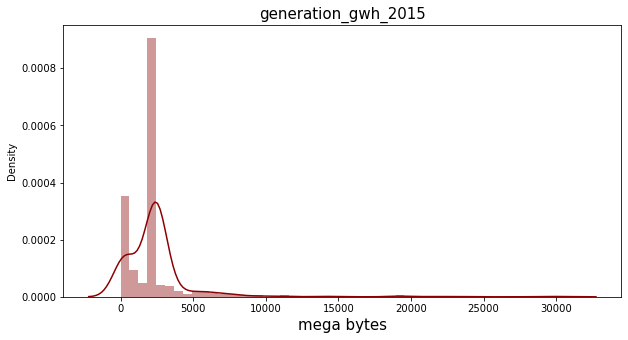

In [67]:
plt.figure(figsize=(10,5))
sns.distplot(df3['generation_gwh_2015'],color='darkred')
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('mega bytes', fontsize=15)
plt.show()

Skewness is pesent in generation_gwh_2015 right side

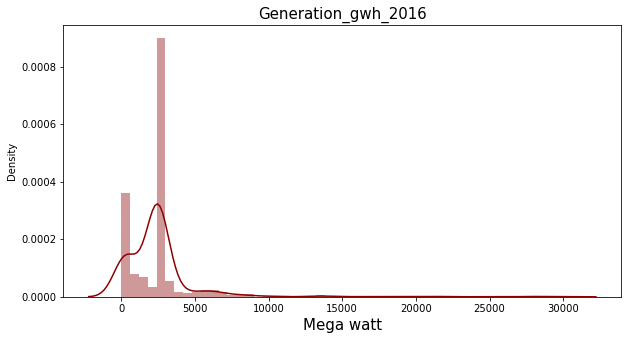

In [68]:
plt.figure(figsize=(10,5))
sns.distplot(df3['generation_gwh_2016'],color='darkred')
plt.title('Generation_gwh_2016', fontsize=15)
plt.xlabel('Mega watt', fontsize=15)
plt.show()

Skewness is pesent in generation_gwh_2016 right side

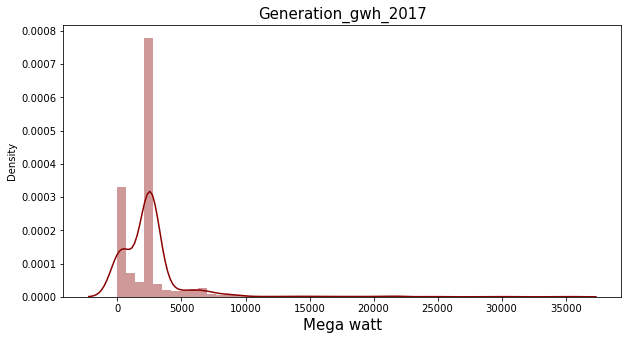

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(df3['generation_gwh_2017'],color='darkred')
plt.title('Generation_gwh_2017', fontsize=15)
plt.xlabel('Mega watt', fontsize=15)
plt.show()

Skewness is pesent in generation_gwh_2017 right side

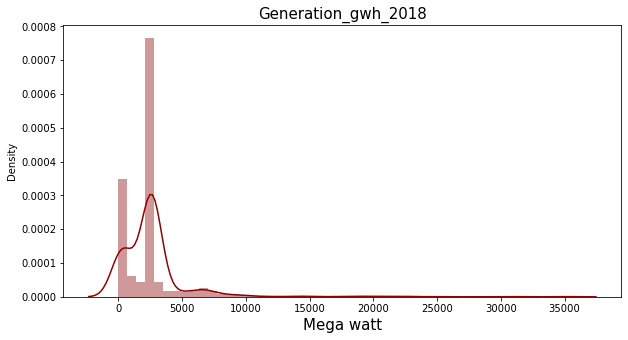

In [70]:
plt.figure(figsize=(10,5))

sns.distplot(df3['generation_gwh_2018'],color='darkred')
plt.title('Generation_gwh_2018', fontsize=15)
plt.xlabel('Mega watt', fontsize=15)
plt.show()

Skewness is pesent in generation_gwh_2018 right side

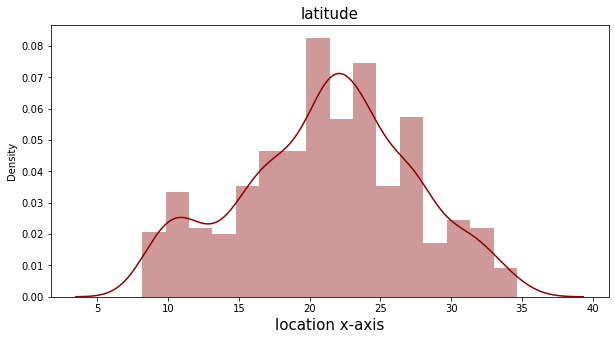

In [71]:
plt.figure(figsize=(10,5))
sns.distplot(df3['latitude'],color='darkred')
plt.title('latitude', fontsize=15)
plt.xlabel('location x-axis', fontsize=15)
plt.show()

not more skewness is present in latitude

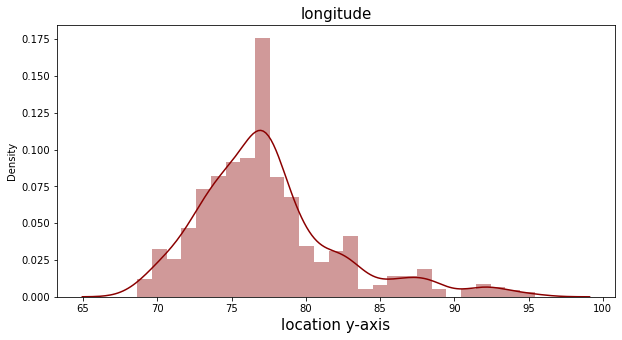

In [72]:
plt.figure(figsize=(10,5))
sns.distplot(df3['longitude'],color='darkred')
plt.title('longitude', fontsize=15)
plt.xlabel('location y-axis', fontsize=15)
plt.show()

Not more skewness is  present in longitude

# CHECK CORRELATION

In [73]:
df3.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,other_fuel1,geolocation_source,primary
capacity_mw,1.000000,0.050984,0.195882,0.274292,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-0.335742,-0.380395,0.003105,2.048653e-01,-0.380395
latitude,0.050984,1.000000,0.036362,0.102069,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,-0.105728,-0.010204,0.036695,-1.842751e-01,-0.010204
longitude,0.195882,0.036362,1.000000,0.092331,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,-0.377812,-0.347948,0.030311,2.523426e-01,-0.347948
commissioning_year,0.274292,0.102069,0.092331,1.000000,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01,0.044059,-0.126650,0.036904,-7.843657e-03,-0.126650
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01,0.044518,-0.124769,0.024505,3.156335e-17,-0.124769
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01,0.038958,-0.124828,0.026790,1.582431e-17,-0.124828
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01,0.026831,-0.131051,0.031575,2.345595e-17,-0.131051
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,8.916868e-01,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01,0.022853,-0.132003,0.021117,4.059479e-18,-0.132003
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,8.849556e-01,9.234611e-01,9.571589e-01,9.826888e-01,1.000000e+00,0.019265,-0.136983,0.035675,3.362799e-19,-0.136983
gppd_idnr,-0.335742,-0.105728,-0.377812,0.044059,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,1.000000,0.609180,0.002333,-4.641741e-01,0.609180


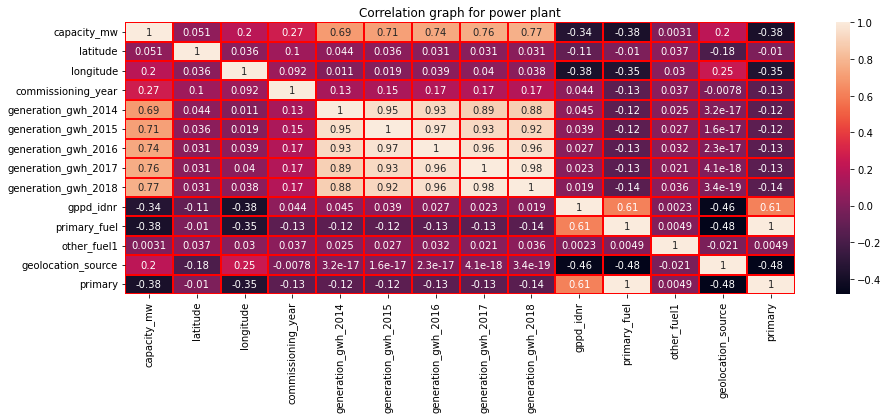

In [74]:
# For more understand drow heeatmap
plt.figure(figsize=(15,5))
sns.heatmap(df3.corr(),linewidth=2,linecolor='red',annot=True)
plt.title('Correlation graph for power plant')
plt.savefig('Correlation graph for power plant')
plt.show()

1. capacity_mw is correlated with target with -38%, it is the good bond between
2. Latitude is correlated with target with -10%, it is the good bond between.
3. Longitude is correlated with target with -35%, it is the strong bond between.
4. Commisioning_year is correlated with target with -13%, it is the good bond between.
5. generation_gwh_2014 is correlated with target with -12%, it is the good bond between.
6. generation_gwh_2015 is correlated with target with -12%, it is the good bond between.
7. generation_gwh_2016 is correlated with target with -13%, it is the good bond between.
8. generation_gwh_2017 is correlated with target with -13%, it is the good bond between.
9. generation_gwh_2018 is correlated with target with -14%, it is the good bond between.
10. Gppd_idnr is correlated with target with 61%, it is the strong bond between.
11. Other_fuel_1 is correlated with target with 0.49%, it is the very poor bond between
12. mGeolocation_source is correlated with target with -48%, it is the strong bond between.

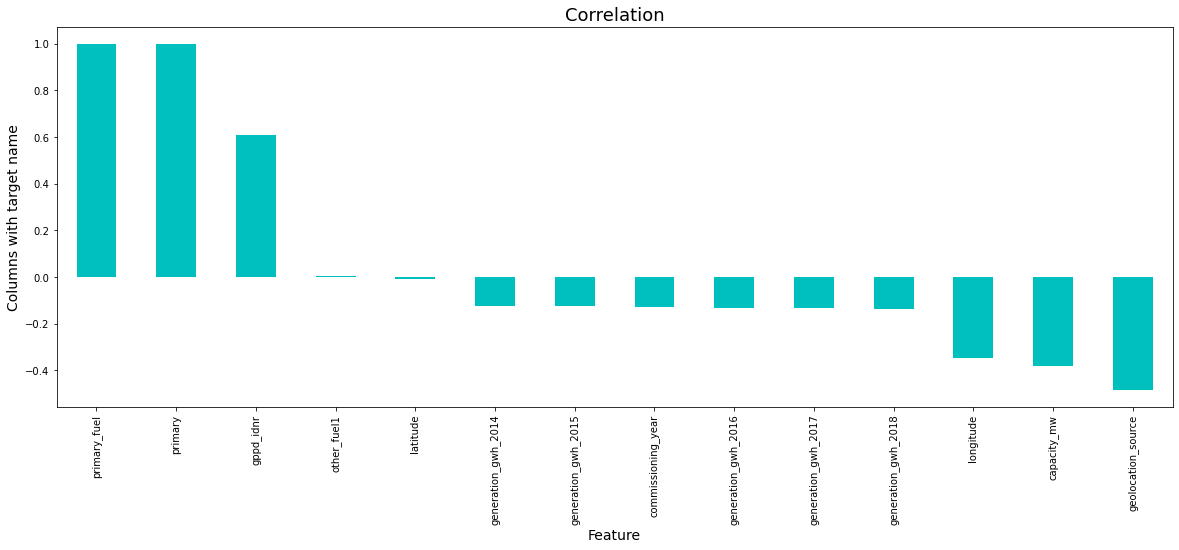

In [75]:
plt.figure(figsize=(20,7))
df3.corr()['primary_fuel'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Check outliers

In [76]:
# outliers laibary
from scipy.stats import zscore

In [77]:
(np.abs(zscore(df3))<3).all().all()  #check outliers in whole dataset

False

In [78]:
# check outliers in each columns
(np.abs(zscore(df3))<3).all()

capacity_mw            False
latitude                True
longitude              False
commissioning_year     False
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
gppd_idnr               True
primary_fuel            True
other_fuel1            False
geolocation_source      True
primary                 True
dtype: bool

Outliers are present--> 
1. capacity_mw False 2.longitude False 3.year_of_capacity_data False 4.generation_gwh_2014 False 5.generation_gwh_2015 False 6.generation_gwh_2016 False 7.generation_gwh_2017 False 8.generation_gwh_2018 False 9.source False 10.generation_data_source False

# we don't touch object-type data and target and do not apply any type of transformation on it so we separate it

drop other_fuel bcoz it is less correlated with target variable

In [79]:
df2=df2.drop(['other_fuel1','primary'],axis=1)
df2

,gppd_idnr,primary_fuel,geolocation_source
0,657,6,1
1,519,1,2
2,853,7,2
3,0,2,2
4,1,1,2
...,...,...,...
902,491,1,2
903,822,6,0
904,891,7,2
905,539,1,2


# Only transformation method apply on numerical value

In [80]:
df1   #Numerical data

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Apply IQR method

In [81]:
q1=df1.quantile(0.25)
q1

capacity_mw              16.725000
latitude                 17.072000
longitude                74.388900
commissioning_year     1997.091082
generation_gwh_2014    1211.362750
generation_gwh_2015     916.000000
generation_gwh_2016     896.500214
generation_gwh_2017     882.594850
generation_gwh_2018     824.842340
Name: 0.25, dtype: float64

In [82]:
q2=df1.quantile(0.75)
q2

capacity_mw             385.250000
latitude                 25.176450
longitude                79.206100
commissioning_year     2003.000000
generation_gwh_2014    2431.823590
generation_gwh_2015    2428.226946
generation_gwh_2016    2467.936859
generation_gwh_2017    2547.759305
generation_gwh_2018    2600.804099
Name: 0.75, dtype: float64

In [83]:
iqr=q2-q1
iqr

capacity_mw             368.525000
latitude                  8.104450
longitude                 4.817200
commissioning_year        5.908918
generation_gwh_2014    1220.460840
generation_gwh_2015    1512.226946
generation_gwh_2016    1571.436645
generation_gwh_2017    1665.164455
generation_gwh_2018    1775.961758
dtype: float64

In [84]:
upper=q2+(1.5*iqr)
lower=q1-(1.5*iqr)

In [85]:
df1=df1[(df1>lower) & (df1<upper)]
df1

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,NaN,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,NaN,21.9603,82.4091,NaN,3035.550000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
902,NaN,16.2949,77.3568,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [86]:
df.isnull().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [87]:
# Remove null values
from sklearn.impute import SimpleImputer

In [88]:
imp=SimpleImputer(strategy='mean')

In [89]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [90]:
df1

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.500000,28.1839,73.240700,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.000000,24.7663,74.609000,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.200000,21.9038,69.373200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.000000,23.8712,76.557193,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,140.638748,21.9603,82.409100,1998.469705,3035.550000,1840.896308,1853.607128,1909.661252,1926.922305
...,...,...,...,...,...,...,...,...,...
902,140.638748,16.2949,77.356800,1998.469705,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.000000,12.8932,78.165400,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.500000,15.2758,75.581100,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.000000,24.3500,73.747700,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [91]:
df1.isnull().sum()  #check null values after apply impute method

capacity_mw            0
latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# Check outliers after remove outliers

In [92]:
(np.abs(zscore(df1))<3).all()

capacity_mw            False
latitude                True
longitude               True
commissioning_year     False
generation_gwh_2014     True
generation_gwh_2015     True
generation_gwh_2016     True
generation_gwh_2017     True
generation_gwh_2018     True
dtype: bool

# Check skewness

In [93]:
df1.skew()

capacity_mw            1.998448
latitude              -0.149698
longitude              0.307448
commissioning_year     1.417787
generation_gwh_2014   -0.810500
generation_gwh_2015   -0.604024
generation_gwh_2016   -0.575948
generation_gwh_2017   -0.530402
generation_gwh_2018   -0.486191
dtype: float64

# Take threshold values for skewness is +/-0.5,then skew is present in-->
1. capacity_mw-->            1.998448
2. commissioning_year-->     1.417787
3. generation_gwh_2014-->   -0.810500
4. generation_gwh_2015-->  -0.604024
5. generation_gwh_2016-->  -0.575948
6. generation_gwh_2017-->   -0.530402

# Remove skewness

In [94]:
from sklearn.preprocessing import power_transform

In [95]:
pt =power_transform

In [96]:
df3=pt(df1,method='yeo-johnson')

In [97]:
type(df3)

numpy.ndarray

After apply power method our dataset change from dataframe to numpy array,so first we change it into dataframe 

In [98]:
df4=pd.DataFrame(data=df3,columns=df1.columns)
df4

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.727613,1.159436,-0.986022,1.409983e-14,0.588109,0.594907,0.607477,0.609881,0.626952
1,0.355175,0.579032,-0.546600,-1.554312e-15,0.588109,0.594907,0.607477,0.609881,0.626952
2,-0.245034,0.099912,-2.332660,-1.554312e-15,0.588109,0.594907,0.607477,0.609881,0.626952
3,0.573905,0.428491,0.049014,6.272760e-15,-1.286832,-0.891460,-0.824500,-1.066065,-1.077823
4,0.602168,0.109302,1.651023,0.000000e+00,1.171776,0.077668,0.087103,0.095121,0.108967
...,...,...,...,...,...,...,...,...,...
902,0.602168,-0.817376,0.283841,0.000000e+00,0.588109,-2.005230,-1.583160,-0.855506,-1.012984
903,-1.651606,-1.357110,0.515883,-1.554312e-15,0.588109,0.594907,0.607477,0.609881,0.626952
904,-0.512563,-0.980536,-0.245138,-1.554312e-15,0.588109,0.594907,0.607477,0.609881,0.626952
905,0.218922,0.508938,-0.821089,-1.554312e-15,0.588109,0.594907,0.607477,0.609881,0.626952


In [99]:
df4.skew()

capacity_mw           -0.023079
latitude              -0.074269
longitude             -0.001464
commissioning_year     0.000000
generation_gwh_2014   -0.899949
generation_gwh_2015   -0.813247
generation_gwh_2016   -0.802496
generation_gwh_2017   -0.798609
generation_gwh_2018   -0.792918
dtype: float64

As we see that after apply 1st time skewness is not remove,so we try once more time.

In [100]:
x=power_transform(df4)

In [101]:
x1=pd.DataFrame(x,columns=df1.columns)

In [102]:
x1.skew()

capacity_mw           -0.003456
latitude               0.015915
longitude              0.019428
commissioning_year    -2.800566
generation_gwh_2014    0.221871
generation_gwh_2015    0.189276
generation_gwh_2016    0.152795
generation_gwh_2017    0.186216
generation_gwh_2018    0.181738
dtype: float64

All variables comes under threshold value +/-0.5 except commising_year so we drop it.

# merge both object and int type dataset

In [103]:
df=pd.concat([x1,df2],axis=1)
df

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,geolocation_source
0,-1.716915,1.169882,-0.985714,0.645040,0.505827,0.512405,0.529201,0.535255,0.559946,657,6,1
1,0.350089,0.566160,-0.548924,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,519,1,2
2,-0.250634,0.078091,-2.318612,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,853,7,2
3,0.570229,0.411650,0.045344,0.645040,-1.280996,-1.021547,-0.978737,-1.131575,-1.140880,0,2,2
4,0.598714,0.087546,1.657254,0.645040,1.591464,-0.186214,-0.180737,-0.161216,-0.149671,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.598714,-0.823480,0.280548,0.645040,0.505827,-1.642848,-1.430204,-0.993218,-1.099893,491,1,2
903,-1.642156,-1.339370,0.513414,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,822,6,0
904,-0.516745,-0.980329,-0.248522,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,891,7,2
905,0.213252,0.494098,-0.821903,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,539,1,2


# Check Multicolonility in dataset

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variable']=df.columns
    vif['VIF Factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return[vif]

In [106]:
calc_vif(df)

[               Variable  VIF Factor
 0           capacity_mw    1.698415
 1              latitude    1.055840
 2             longitude    1.259245
 3    commissioning_year    1.032044
 4   generation_gwh_2014    2.738417
 5   generation_gwh_2015    3.363768
 6   generation_gwh_2016    4.089391
 7   generation_gwh_2017    3.988476
 8   generation_gwh_2018    3.837306
 9             gppd_idnr    7.326137
 10         primary_fuel    5.155171
 11   geolocation_source    3.610358]

Multicolonility present in gppd_idnr and primary so we drop gppd_idnr

In [107]:
df=df.drop(['gppd_idnr'],axis=1)
df

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel,geolocation_source
0,-1.716915,1.169882,-0.985714,0.645040,0.505827,0.512405,0.529201,0.535255,0.559946,6,1
1,0.350089,0.566160,-0.548924,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,1,2
2,-0.250634,0.078091,-2.318612,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,7,2
3,0.570229,0.411650,0.045344,0.645040,-1.280996,-1.021547,-0.978737,-1.131575,-1.140880,2,2
4,0.598714,0.087546,1.657254,0.645040,1.591464,-0.186214,-0.180737,-0.161216,-0.149671,1,2
...,...,...,...,...,...,...,...,...,...,...,...
902,0.598714,-0.823480,0.280548,0.645040,0.505827,-1.642848,-1.430204,-0.993218,-1.099893,1,2
903,-1.642156,-1.339370,0.513414,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,6,0
904,-0.516745,-0.980329,-0.248522,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,7,2
905,0.213252,0.494098,-0.821903,-0.146334,0.505827,0.512405,0.529201,0.535255,0.559946,1,2


# split in independent and dependent variable

In [108]:
x=df.drop(['primary_fuel','commissioning_year'],axis=1)

In [109]:
y=df.primary_fuel

In [110]:
y.shape

(907,)

In [111]:
y=pd.DataFrame(data=y)

In [112]:
y

,primary_fuel
0,6
1,1
2,7
3,2
4,1
...,...
902,1
903,6
904,7
905,1


# CHECK ITEM VALUES IN TARGET VARIABLE

In [113]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# In target variables all values are not equal so apply SMOTE METHOD for equality

# SMOTE METHOD

In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
sm=SMOTE()

In [116]:
x,y=sm.fit_resample(x,y)

In [117]:
y.value_counts()

primary_fuel
0               258
1               258
2               258
3               258
4               258
5               258
6               258
7               258
dtype: int64

Now all values are equal

In [118]:
x.shape

(2064, 9)

In [119]:
y.shape

(2064, 1)

# Standard scaler method

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
st=StandardScaler()

In [122]:
x=st.fit_transform(x)

In [123]:
x.shape

(2064, 9)

In [124]:
y.shape

(2064, 1)

# Apply Diffrent Model Selection For find Best Model

# TRAIN_TEST_SPLIT METHOD

In [125]:
LO=LogisticRegression()
DT=DecisionTreeClassifier()
SV=SVC()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF=RandomForestClassifier()

# MODEL-->LOGISTIC REGRESSION

In [126]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LO.fit(x_train,y_train)
    pred=LO.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 52.54237288135594
Max Accuracy 52.54237288135594 at random_state 0


At random_state 1 model give accuracy--> 54.72154963680388
Max Accuracy 54.72154963680388 at random_state 1


At random_state 2 model give accuracy--> 51.08958837772397
At random_state 3 model give accuracy--> 54.23728813559322
At random_state 4 model give accuracy--> 50.363196125908
At random_state 5 model give accuracy--> 52.05811138014528
At random_state 6 model give accuracy--> 56.416464891041166
Max Accuracy 56.416464891041166 at random_state 6


At random_state 7 model give accuracy--> 53.510895883777245
At random_state 8 model give accuracy--> 56.17433414043583
At random_state 9 model give accuracy--> 52.54237288135594
At random_state 10 model give accuracy--> 57.6271186440678
Max Accuracy 57.6271186440678 at random_state 10


At random_state 11 model give accuracy--> 54.47941888619855
At random_state 12 model give accuracy--> 56.17433414043583
At random_state 13 model g

At random state 33 model give accuracy score 59.80%

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=33)
LO.fit(x_train,y_train)
pred_test=LO.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(LO.score(x_train,y_train))*100}")

Confusion Matrix : [[33  0  0  0  0  0  0 10]
 [ 4 24  5  4  7  0  0  1]
 [ 0  6 28  4  4  2  0  8]
 [ 6  6  9 21  2 10  0  2]
 [ 0  8  2  0 34  0  0  0]
 [ 2  4  1  2  0 14  0 19]
 [ 0  1  0  0  0  0 68  0]
 [29  3  0  0  3  2  0 25]]
Classification Report :               precision    recall  f1-score   support

           0       0.45      0.77      0.56        43
           1       0.46      0.53      0.49        45
           2       0.62      0.54      0.58        52
           3       0.68      0.38      0.48        56
           4       0.68      0.77      0.72        44
           5       0.50      0.33      0.40        42
           6       1.00      0.99      0.99        69
           7       0.38      0.40      0.39        62

    accuracy                           0.60       413
   macro avg       0.60      0.59      0.58       413
weighted avg       0.62      0.60      0.59       413

Accuracy Score  : 59.80629539951574
Dataset Score : 56.08721986674743


1. Most Precision score from oil_FUEL-->100%
2. Avg of total dataset-->60%
3. Accuracy score-->59.80%
4. Train_score-->56.08

# MODEL--> DECISON TREE CLASSIFIER

In [130]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    pred=DT.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 84.7457627118644
Max Accuracy 84.7457627118644 at random_state 0


At random_state 1 model give accuracy--> 83.29297820823246
At random_state 2 model give accuracy--> 89.58837772397095
Max Accuracy 89.58837772397095 at random_state 2


At random_state 3 model give accuracy--> 85.95641646489103
At random_state 4 model give accuracy--> 81.35593220338984
At random_state 5 model give accuracy--> 83.53510895883777
At random_state 6 model give accuracy--> 80.1452784503632
At random_state 7 model give accuracy--> 83.7772397094431
At random_state 8 model give accuracy--> 83.05084745762711
At random_state 9 model give accuracy--> 82.32445520581115
At random_state 10 model give accuracy--> 82.32445520581115
At random_state 11 model give accuracy--> 80.62953995157385
At random_state 12 model give accuracy--> 82.80871670702179
At random_state 13 model give accuracy--> 79.41888619854721
At random_state 14 model give accuracy--> 83.53510895883777
At random_st

At random state 2 model give accuracy score 89.58%

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={DT.score(x_train,y_train)*100}")

Confusion_Matrix= [[37  0  0  4  0  0  0  2]
 [ 0 38  3  4  3  3  0  3]
 [ 0  3 37  3  0  2  0  2]
 [ 1  0  6 38  0  1  0  5]
 [ 0  1  0  0 55  0  0  0]
 [ 0  0  2  0  0 53  0  0]
 [ 0  0  0  0  0  0 58  1]
 [ 0  0  0  2  0  1  1 44]]
Classification_Report=               precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.90      0.70      0.79        54
           2       0.77      0.79      0.78        47
           3       0.75      0.75      0.75        51
           4       0.95      0.98      0.96        56
           5       0.88      0.96      0.92        55
           6       0.98      0.98      0.98        59
           7       0.77      0.92      0.84        48

    accuracy                           0.87       413
   macro avg       0.87      0.87      0.87       413
weighted avg       0.88      0.87      0.87       413

Accuracy_Score= 87.16707021791767
Dataset_Score=99.8182919442762


1. Most Precision score from OIL_FUEL-->100%
2. Avg of total dataset-->87%
3. Accuracy score-->87.16%
4. Train_score-->99.81%
5. Try another model for finding best model

# MODEL-->SVC

In [132]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    pred=SV.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 77.4818401937046
Max Accuracy 77.4818401937046 at random_state 0


At random_state 1 model give accuracy--> 79.66101694915254
Max Accuracy 79.66101694915254 at random_state 1


At random_state 2 model give accuracy--> 75.78692493946731
At random_state 3 model give accuracy--> 76.75544794188862
At random_state 4 model give accuracy--> 76.27118644067797
At random_state 5 model give accuracy--> 76.99757869249395
At random_state 6 model give accuracy--> 75.78692493946731
At random_state 7 model give accuracy--> 78.93462469733656
At random_state 8 model give accuracy--> 75.78692493946731
At random_state 9 model give accuracy--> 76.02905569007264
At random_state 10 model give accuracy--> 76.51331719128329
At random_state 11 model give accuracy--> 74.818401937046
At random_state 12 model give accuracy--> 77.72397094430993
At random_state 13 model give accuracy--> 73.36561743341404
At random_state 14 model give accuracy--> 76.75544794188862
At random_st

At random state 30 model give accuracy score 81.11%

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={SV.score(x_train,y_train)*100}")

Confusion_Matrix= [[63  0  0  0  0  0  0  3]
 [ 4 27  0  3  4  0  0  2]
 [ 0  2 36  9  1  8  0  0]
 [ 0  4  5 19  0  7  0  2]
 [ 0  0  0  0 54  0  0  0]
 [ 5  2  2  2  0 53  0  1]
 [ 1  1  0  0  0  0 51  0]
 [ 7  1  0  0  1  1  0 32]]
Classification_Report=               precision    recall  f1-score   support

           0       0.79      0.95      0.86        66
           1       0.73      0.68      0.70        40
           2       0.84      0.64      0.73        56
           3       0.58      0.51      0.54        37
           4       0.90      1.00      0.95        54
           5       0.77      0.82      0.79        65
           6       1.00      0.96      0.98        53
           7       0.80      0.76      0.78        42

    accuracy                           0.81       413
   macro avg       0.80      0.79      0.79       413
weighted avg       0.81      0.81      0.81       413

Accuracy_Score= 81.1138014527845
Dataset_Score=77.64990914597215


1. Most Precision score from OIL_FUEL-->100%
2. Avg of total dataset-->80%
3. Accuracy score-->81.11%
4. Train_score-->77.64%
5. Try another model for finding the best model

# MODEL-->KNEIGHBORS CLASSIFIER

In [134]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    pred=KN.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 83.05084745762711
Max Accuracy 83.05084745762711 at random_state 0


At random_state 1 model give accuracy--> 83.05084745762711
At random_state 2 model give accuracy--> 84.98789346246973
Max Accuracy 84.98789346246973 at random_state 2


At random_state 3 model give accuracy--> 84.26150121065376
At random_state 4 model give accuracy--> 84.26150121065376
At random_state 5 model give accuracy--> 82.80871670702179
At random_state 6 model give accuracy--> 82.56658595641646
At random_state 7 model give accuracy--> 85.23002421307507
Max Accuracy 85.23002421307507 at random_state 7


At random_state 8 model give accuracy--> 83.05084745762711
At random_state 9 model give accuracy--> 79.1767554479419
At random_state 10 model give accuracy--> 84.50363196125909
At random_state 11 model give accuracy--> 81.59806295399515
At random_state 12 model give accuracy--> 84.7457627118644
At random_state 13 model give accuracy--> 81.59806295399515
At random_state 14 

At random state 16 model give accuracy score 86.44%

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=16)
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={KN.score(x_train,y_train)*100}")

Confusion_Matrix= [[53  1  0  0  0  0  0  2]
 [ 4 28  4  4  3  0  0  2]
 [ 0  1 43  0  0  3  0  3]
 [ 1  7  7 37  1  1  0  1]
 [ 0  0  0  0 53  0  0  0]
 [ 0  0  1  2  0 51  0  0]
 [ 0  0  0  0  0  1 51  0]
 [ 3  0  0  1  0  2  1 41]]
Classification_Report=               precision    recall  f1-score   support

           0       0.87      0.95      0.91        56
           1       0.76      0.62      0.68        45
           2       0.78      0.86      0.82        50
           3       0.84      0.67      0.75        55
           4       0.93      1.00      0.96        53
           5       0.88      0.94      0.91        54
           6       0.98      0.98      0.98        52
           7       0.84      0.85      0.85        48

    accuracy                           0.86       413
   macro avg       0.86      0.86      0.86       413
weighted avg       0.86      0.86      0.86       413

Accuracy_Score= 86.4406779661017
Dataset_Score=88.18897637795276


1. Most Precision score from OIL_FUEL-->100%
2. Avg of total dataset-->87%
3. Accuracy score-->86.44%
4. Train_score-->88.18%
5. Try another model for finding the best model

# MODEL-->ADA BOOST CLASSIFIER

In [136]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    pred=AD.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 38.7409200968523
Max Accuracy 38.7409200968523 at random_state 0


At random_state 1 model give accuracy--> 40.92009685230024
Max Accuracy 40.92009685230024 at random_state 1


At random_state 2 model give accuracy--> 42.3728813559322
Max Accuracy 42.3728813559322 at random_state 2


At random_state 3 model give accuracy--> 41.404358353510894
At random_state 4 model give accuracy--> 40.67796610169492
At random_state 5 model give accuracy--> 49.39467312348668
Max Accuracy 49.39467312348668 at random_state 5


At random_state 6 model give accuracy--> 42.3728813559322
At random_state 7 model give accuracy--> 39.46731234866828
At random_state 8 model give accuracy--> 45.27845036319613
At random_state 9 model give accuracy--> 30.26634382566586
At random_state 10 model give accuracy--> 32.92978208232446
At random_state 11 model give accuracy--> 39.22518159806295
At random_state 12 model give accuracy--> 36.56174334140436
At random_state 13 model give 

At random state 5 models give an accuracy score of 49.39%

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={AD.score(x_train,y_train)*100}")

Confusion_Matrix= [[41  0  0  1  0  0  0  0]
 [10  0  2  6 29  1  0  0]
 [ 9  0  2  4 34  2  0  0]
 [12  0  0 19 29  5  0  0]
 [ 0  0  0  1 61  1  0  0]
 [21  0  0  0 11  7  0  0]
 [ 0  0  0  0  0  0 57  0]
 [17  0  1 11  2  0  0 17]]
Classification_Report=               precision    recall  f1-score   support

           0       0.37      0.98      0.54        42
           1       0.00      0.00      0.00        48
           2       0.40      0.04      0.07        51
           3       0.45      0.29      0.36        65
           4       0.37      0.97      0.53        63
           5       0.44      0.18      0.25        39
           6       1.00      1.00      1.00        57
           7       1.00      0.35      0.52        48

    accuracy                           0.49       413
   macro avg       0.50      0.48      0.41       413
weighted avg       0.51      0.49      0.42       413

Accuracy_Score= 49.39467312348668
Dataset_Score=48.031496062992126


1. Avg of total dataset-->50%
2. Accuracy score-->49.39%
3. Train_score-->48.03%
4. Try another model for finding the best model

# MODEL-->GRADIENT BOOSTING CLASSIFIER

In [138]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    pred=GR.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 85.23002421307507
Max Accuracy 85.23002421307507 at random_state 0


At random_state 1 model give accuracy--> 84.01937046004842
At random_state 2 model give accuracy--> 86.19854721549636
Max Accuracy 86.19854721549636 at random_state 2


At random_state 3 model give accuracy--> 87.16707021791767
Max Accuracy 87.16707021791767 at random_state 3


At random_state 4 model give accuracy--> 83.53510895883777
At random_state 5 model give accuracy--> 84.98789346246973
At random_state 6 model give accuracy--> 84.26150121065376
At random_state 7 model give accuracy--> 86.4406779661017
At random_state 8 model give accuracy--> 81.84019370460048
At random_state 9 model give accuracy--> 84.01937046004842
At random_state 10 model give accuracy--> 86.4406779661017
At random_state 11 model give accuracy--> 81.84019370460048
At random_state 12 model give accuracy--> 86.4406779661017
At random_state 13 model give accuracy--> 84.26150121065376
At random_state 14 m

At random state 18 models give an accuracy score of 88.13%

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=18)
GR.fit(x_train,y_train)
pred=GR.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={GR.score(x_train,y_train)*100}")

Confusion_Matrix= [[50  1  0  0  0  0  0  2]
 [ 2 35  4  2  0  0  0  2]
 [ 1  2 44  2  2  2  0  2]
 [ 2  6  5 40  0  0  0  2]
 [ 0  2  0  0 42  1  0  0]
 [ 0  0  1  0  0 50  0  1]
 [ 0  0  0  0  0  0 51  0]
 [ 4  1  0  0  0  0  0 52]]
Classification_Report=               precision    recall  f1-score   support

           0       0.85      0.94      0.89        53
           1       0.74      0.78      0.76        45
           2       0.81      0.80      0.81        55
           3       0.91      0.73      0.81        55
           4       0.95      0.93      0.94        45
           5       0.94      0.96      0.95        52
           6       1.00      1.00      1.00        51
           7       0.85      0.91      0.88        57

    accuracy                           0.88       413
   macro avg       0.88      0.88      0.88       413
weighted avg       0.88      0.88      0.88       413

Accuracy_Score= 88.13559322033898
Dataset_Score=98.0617807389461


1. Most Precision score from OIL_FUEL-->100%
2. Avg of total dataset-->88%
3. Accuracy score-->88.13%
4. Train_score-->98.06%
5. Try another model for finding the best model

# MODEL-->RANDOM FOREST CLASSIFIER

In [140]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 89.10411622276028
Max Accuracy 89.10411622276028 at random_state 0


At random_state 1 model give accuracy--> 88.37772397094432
At random_state 2 model give accuracy--> 89.58837772397095
Max Accuracy 89.58837772397095 at random_state 2


At random_state 3 model give accuracy--> 87.65133171912834
At random_state 4 model give accuracy--> 86.68280871670703
At random_state 5 model give accuracy--> 87.40920096852301
At random_state 6 model give accuracy--> 84.7457627118644
At random_state 7 model give accuracy--> 88.37772397094432
At random_state 8 model give accuracy--> 85.4721549636804
At random_state 9 model give accuracy--> 86.92493946731234
At random_state 10 model give accuracy--> 87.16707021791767
At random_state 11 model give accuracy--> 84.7457627118644
At random_state 12 model give accuracy--> 85.4721549636804
At random_state 13 model give accuracy--> 86.92493946731234
At random_state 14 model give accuracy--> 84.98789346246973
At random_st

At random state 30 models give an accuracy score of 91.52%

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={RF.score(x_train,y_train)*100}")

Confusion_Matrix= [[62  0  0  1  0  0  0  3]
 [ 1 34  1  0  1  1  0  2]
 [ 0  3 46  1  0  4  0  2]
 [ 0  2  2 32  0  0  0  1]
 [ 0  0  0  0 54  0  0  0]
 [ 0  1  0  2  0 61  0  1]
 [ 0  0  0  0  0  0 51  2]
 [ 0  0  0  3  0  0  0 39]]
Classification_Report=               precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.85      0.85      0.85        40
           2       0.94      0.82      0.88        56
           3       0.82      0.86      0.84        37
           4       0.98      1.00      0.99        54
           5       0.92      0.94      0.93        65
           6       1.00      0.96      0.98        53
           7       0.78      0.93      0.85        42

    accuracy                           0.92       413
   macro avg       0.91      0.91      0.91       413
weighted avg       0.92      0.92      0.92       413

Accuracy_Score= 91.76755447941889
Dataset_Score=99.87886129618413


1. Most Precision score from OIL_FUEL-->100%
2. Avg of total dataset-->91%
3. Accuracy score-->91.76%
4. Train_score-->99.87%
5. Try another model for finding the best model

# By train_test_split method we find our best model-->RANDOM FOREST CLASSIFIER
1. Avg of total dataset-->91%
2. Accuracy score-->91.76%
3. Train_score-->99.87%
4. All values are higher compare to another model

# Try another method for finding best model

# CROSS VAL SCORE METHOD

# CV-->LOGISTIC REGRESSION

In [142]:
pred=LO.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(LO,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.5402131782945736 and the test accuracy is 0.5690072639225182


At cross fold  CV 3,and the mean_score is:0.5431201550387597 and the test accuracy is 0.5690072639225182


At cross fold  CV 4,and the mean_score is:0.5426356589147286 and the test accuracy is 0.5690072639225182


At cross fold  CV 5,and the mean_score is:0.5450574766684688 and the test accuracy is 0.5690072639225182


At cross fold  CV 6,and the mean_score is:0.5392441860465117 and the test accuracy is 0.5690072639225182


At cross fold  CV 7,and the mean_score is:0.5411721104906854 and the test accuracy is 0.5690072639225182


At cross fold  CV 8,and the mean_score is:0.5445736434108528 and the test accuracy is 0.5690072639225182


At cross fold  CV 9,and the mean_score is:0.542623884564268 and the test accuracy is 0.5690072639225182




At cv=5 model give 54.50% and accuracy_score-->56.90%

In [143]:
from sklearn.metrics import plot_roc_curve

In [144]:
plot_roc_curve(LO,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got LogisticRegression fit on multiclass (8 classes) data

# MODEL-->DECISION TREE CLASSIFIER

In [145]:
pred=DT.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(DT,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8042635658914729 and the test accuracy is 0.9685230024213075


At cross fold  CV 3,and the mean_score is:0.8265503875968992 and the test accuracy is 0.9685230024213075


At cross fold  CV 4,and the mean_score is:0.8328488372093023 and the test accuracy is 0.9685230024213075


At cross fold  CV 5,and the mean_score is:0.84255036554691 and the test accuracy is 0.9685230024213075


At cross fold  CV 6,and the mean_score is:0.8483527131782945 and the test accuracy is 0.9685230024213075


At cross fold  CV 7,and the mean_score is:0.8454332822717464 and the test accuracy is 0.9685230024213075


At cross fold  CV 8,and the mean_score is:0.8468992248062015 and the test accuracy is 0.9685230024213075


At cross fold  CV 9,and the mean_score is:0.8536928042528954 and the test accuracy is 0.9685230024213075




At cv=9 model give 85.36% and accuracy_score-->96.85%

# MODEL-->SVC

In [146]:
pred=SV.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(SV,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.7403100775193798 and the test accuracy is 0.8111380145278451


At cross fold  CV 3,and the mean_score is:0.7592054263565892 and the test accuracy is 0.8111380145278451


At cross fold  CV 4,and the mean_score is:0.7630813953488372 and the test accuracy is 0.8111380145278451


At cross fold  CV 5,and the mean_score is:0.7684089893979642 and the test accuracy is 0.8111380145278451


At cross fold  CV 6,and the mean_score is:0.7698643410852714 and the test accuracy is 0.8111380145278451


At cross fold  CV 7,and the mean_score is:0.7703480423646456 and the test accuracy is 0.8111380145278451


At cross fold  CV 8,and the mean_score is:0.7688953488372093 and the test accuracy is 0.8111380145278451


At cross fold  CV 9,and the mean_score is:0.7718266776364364 and the test accuracy is 0.8111380145278451




At cv=9 model give 77.17% and accuracy_score-->81.11%

# MODEL-->KNEIGHBORS CLASSIFIER

In [147]:
pred=KN.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(KN,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8071705426356589 and the test accuracy is 0.9007263922518159


At cross fold  CV 3,and the mean_score is:0.8212209302325583 and the test accuracy is 0.9007263922518159


At cross fold  CV 4,and the mean_score is:0.8347868217054264 and the test accuracy is 0.9007263922518159


At cross fold  CV 5,and the mean_score is:0.8405968640541621 and the test accuracy is 0.9007263922518159


At cross fold  CV 6,and the mean_score is:0.8396317829457365 and the test accuracy is 0.9007263922518159


At cross fold  CV 7,and the mean_score is:0.8405939615555666 and the test accuracy is 0.9007263922518159


At cross fold  CV 8,and the mean_score is:0.8381782945736433 and the test accuracy is 0.9007263922518159


At cross fold  CV 9,and the mean_score is:0.8386705482775352 and the test accuracy is 0.9007263922518159




At cv=7 model give 84.04% and accuracy_score-->90.07%

# MODEL-->ADA BOOST CLASSIFIER

In [148]:
pred=AD.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(AD,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.4210271317829457 and the test accuracy is 0.5108958837772397


At cross fold  CV 3,and the mean_score is:0.4161821705426357 and the test accuracy is 0.5108958837772397


At cross fold  CV 4,and the mean_score is:0.39486434108527135 and the test accuracy is 0.5108958837772397


At cross fold  CV 5,and the mean_score is:0.40020099203084236 and the test accuracy is 0.5108958837772397


At cross fold  CV 6,and the mean_score is:0.41375968992248063 and the test accuracy is 0.5108958837772397


At cross fold  CV 7,and the mean_score is:0.40649305727133467 and the test accuracy is 0.5108958837772397


At cross fold  CV 8,and the mean_score is:0.40261627906976744 and the test accuracy is 0.5108958837772397


At cross fold  CV 9,and the mean_score is:0.404075691411936 and the test accuracy is 0.5108958837772397




At cv=2 model give 42.10% and accuracy_score-->51.08%

# MODEL-->GRADIENT BOOSTING CLASSIFIER

In [149]:
pred=GR.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(GR,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8284883720930233 and the test accuracy is 0.9661016949152542


At cross fold  CV 3,and the mean_score is:0.8468992248062016 and the test accuracy is 0.9661016949152542


At cross fold  CV 4,and the mean_score is:0.8570736434108526 and the test accuracy is 0.9661016949152542


At cross fold  CV 5,and the mean_score is:0.8531900138696255 and the test accuracy is 0.9661016949152542


At cross fold  CV 6,and the mean_score is:0.8517441860465116 and the test accuracy is 0.9661016949152542


At cross fold  CV 7,and the mean_score is:0.8512592446179441 and the test accuracy is 0.9661016949152542


At cross fold  CV 8,and the mean_score is:0.8502906976744186 and the test accuracy is 0.9661016949152542


At cross fold  CV 9,and the mean_score is:0.8532097124654557 and the test accuracy is 0.9661016949152542




At cv=9 model give 85.32% and accuracy_score-->96.61%

# METHOD-->RANDOM FOREST CLASSIFIER

In [150]:
pred=RF.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(RF,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8657945736434108 and the test accuracy is 0.9176755447941889


At cross fold  CV 3,and the mean_score is:0.8817829457364342 and the test accuracy is 0.9176755447941889


At cross fold  CV 4,and the mean_score is:0.8745155038759691 and the test accuracy is 0.9176755447941889


At cross fold  CV 5,and the mean_score is:0.8822621594301701 and the test accuracy is 0.9176755447941889


At cross fold  CV 6,and the mean_score is:0.881782945736434 and the test accuracy is 0.9176755447941889


At cross fold  CV 7,and the mean_score is:0.8827428307884897 and the test accuracy is 0.9176755447941889


At cross fold  CV 8,and the mean_score is:0.876937984496124 and the test accuracy is 0.9176755447941889


At cross fold  CV 9,and the mean_score is:0.8822838216990486 and the test accuracy is 0.9176755447941889




At cv=9 model give 88.22% and accuracy_score-->91.76%

# By cross validation score method we get best---> method RANDOM FOREST CLASIFIER
1. CV_SCORE-->88.22%
2. ACCURACY-->91.76%
3. BOTH ARE HIGHEST AND DIFFRENCE BETWEEN IN CV_SCORE AND ACCURACY IS VERY LOW

# GRID SEARCH CV

In [151]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [152]:
Gs=GridSearchCV(RF,dict1,cv=9)
Gs

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [153]:
Gs.fit(x,y)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [154]:
Gs.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [155]:
Gs.best_score_

0.8275214648861886

In [156]:
Gs.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=7, n_estimators=200)

# Analyse model with full feature

In [157]:
Rf=RandomForestClassifier(criterion='log_loss',max_features='sqrt',n_estimators=200,max_depth=7)
Rf.fit(x_train,y_train)
pred_test=Rf.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(Rf.score(x_train,y_train))*100}")

Confusion Matrix : [[62  0  0  0  0  0  0  4]
 [ 2 28  0  1  4  0  0  5]
 [ 0  3 40  7  0  4  0  2]
 [ 0  4  4 28  0  0  0  1]
 [ 0  0  0  0 54  0  0  0]
 [ 6  0  0  0  0 55  0  4]
 [ 0  0  0  0  0  0 51  2]
 [ 1  0  0  0  0  0  0 41]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.94      0.91        66
           1       0.80      0.70      0.75        40
           2       0.91      0.71      0.80        56
           3       0.78      0.76      0.77        37
           4       0.93      1.00      0.96        54
           5       0.93      0.85      0.89        65
           6       1.00      0.96      0.98        53
           7       0.69      0.98      0.81        42

    accuracy                           0.87       413
   macro avg       0.86      0.86      0.86       413
weighted avg       0.88      0.87      0.87       413

Accuracy Score of Model  : 86.92493946731234
Dataset Score : 87.28043609933374


Here by grid searchCV model selection we find best accuracy for model RANDOM FOREST CLASSIFIER Avg 0.86 Accuracy score 86.92 Dataset score 87.28

# Save the best model

In [158]:
import joblib

In [159]:
joblib.dump(Gs.best_estimator_,'power.pkl')

['power.pkl']